# Lab | Data Aggregation and Filtering

Objective: Use Python programming techniques to filter and order data subsets, group data by one or more variables, and use aggregation functions to obtain insights, and derive meaningful conclusions from the data.

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

Start by reading the dataset, standardizing column names, dealing with null values and creating the month column. You can do so by using the functions you developed in previous labs, or by reading the clean dataset you saved in the last lab `data structuring and combining`.

Then, answer the following questions:

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the median customer lifetime value by education level and gender.

5. Find the maximum, minimum, and average number of open complaints by state and policy type.

6. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('mca_data_clean.csv', sep=';') # load data
df

,unnamed:_0,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
1,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
2,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
3,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
4,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
4539,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
4540,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
4541,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [2]:
# 1. total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign
df1 = df[ (df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]
df1.shape

(27, 27)

In [3]:
# 2. Analyze average total_claim_amount by each policy type and gender with response = Yes

df2 = df[ df['response'] == 'Yes'].groupby(['policy_type','gender']).agg({'total_claim_amount':'mean'}).rename(columns={'total_claim_amount': 'mean_total_claim_amount'})

df2

mean_total_claim_amount
policy_type    gender                         
Corporate Auto F                    404.104008
               M                    391.370774
Personal Auto  F                    457.056315
               M                    472.489180
Special Auto   F                    495.689401
               M                    368.523035

In [6]:
# 3. total customers who have policies in each state, states where there are more than 500 customers.

df3 = df.groupby(['state']).agg({'customer_id':'count'}).rename(columns = {'customer_id':'number_of_customers'})
df3 = df3[df3['number_of_customers'] > 500]
df3

,number_of_customers
state,
Arizona,868
California,1552
Oregon,1281


In [7]:
# 4. Find the median customer lifetime value by education level and gender.
df4 = df.groupby(['education', 'gender']).agg({'customer_lifetime_value': 'median'}).round(2).rename(columns={'customer_lifetime_value':'median_customer_lifetime_value'})
df4

median_customer_lifetime_value
education            gender                                
Bachelor             F                              5752.49
                     M                              5797.38
College              F                              5642.60
                     M                              6005.85
Doctor               F                              5789.85
                     M                              5843.99
High School or Below F                              5978.75
                     M                              6081.48
Master               F                              5714.17
                     M                              5512.34

In [8]:
# 5. Find the maximum, minimum, and average number of open complaints by state and policy type.

df5 = df.groupby(['state','policy_type']).agg({'number_of_open_complaints':['max','min','mean']}).round(2)

df5

number_of_open_complaints          
                                                max min  mean
state      policy_type                                       
Arizona    Corporate Auto                         5   0  0.46
           Personal Auto                          5   0  0.41
           Special Auto                           3   0  0.23
California Corporate Auto                         4   0  0.30
           Personal Auto                          5   0  0.40
           Special Auto                           4   0  0.39
Nevada     Corporate Auto                         3   0  0.39
           Personal Auto                          5   0  0.42
           Special Auto                           3   0  0.29
Oregon     Corporate Auto                         4   0  0.33
           Personal Auto                          5   0  0.37
           Special Auto                           5   0  0.33
Washington Corporate Auto                         4   0  0.47
           Personal Auto                          5   0  0.41
           Special Auto                           4   0  0.56

In [10]:
# 6. The marketing team wants to analyze the number of policies sold by state and month.
# Present the data in a table where the months are arranged as columns and the states are arranged as rows.

df6 = df.groupby(['state','effective_to_date_month']).agg({'customer_id':'count'}).rename(columns={'customer_id':'policies_sold'})

df6 = df6.pivot_table( index=['state'], columns=['effective_to_date_month'], values = 'policies_sold')

df6

effective_to_date_month,1,2
state,,
Arizona,453,415
California,826,726
Nevada,247,197
Oregon,676,605
Washington,207,191


In [14]:
# 7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states 
# with the highest number of policies sold.
'''
Hint:
To accomplish this, you will first need to group the data by state and month, 
then count the number of policies sold for each group. Afterwards, you will need 
to sort the data by the count of policies sold in descending order.
Next, you will select the top 3 states with the highest number of policies sold.
Finally, you will create a new DataFrame that contains the number of policies 
sold by month for each of the top 3 states.
'''

top_3_states = df.groupby(['state']).agg(
    {'customer_id':'count'}).rename(
    columns={'customer_id':'policies_sold'}).sort_values(
    'policies_sold', ascending = False).iloc[:3,-1]

df7 = df[ df['state'].isin(
    list(top_3_states.index))].groupby(
    ['effective_to_date_month','state']).agg(
    {'customer_id':'count'}).rename(
    columns={'customer_id':'policies_sold'}).sort_values(
    ['effective_to_date_month','policies_sold'], ascending=[True,False])

df7

policies_sold
effective_to_date_month state                    
1                       California            826
                        Oregon                676
                        Arizona               453
2                       California            726
                        Oregon                605
                        Arizona               415

In [15]:
# 8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.
# Hint: You can use melt to unpivot the data and create a table that 
# shows the customer response rate (those who responded "Yes") by marketing channel.

df8 = df.groupby(['sales_channel','response']).agg({'response':'count'}).rename(columns={'response':'total'})

df8_pivot = pd.pivot_table(df8.reset_index(), values='total', index ='sales_channel', columns='response')

df8_pivot['response_rate'] = (df8_pivot['Yes'] / df8_pivot['No'] * 100).round(1)

display(df8_pivot)


response,No,Yes,response_rate
sales_channel,,,
Agent,1419,332,23.4
Branch,1123,123,11.0
Call Center,786,97,12.3
Web,574,89,15.5


# Lab | Customer Analysis Round 3
+ For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

### Get the data
+ Use the same jupyter file from the last lab, Customer Analysis Round 3

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

# 1. Show DataFrame info.
display(df.info())

# 2. Describe DataFrame.
display(df.describe().round(2)) # describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     4543 non-null   int64  
 1   customer_id                    4543 non-null   object 
 2   state                          4543 non-null   object 
 3   customer_lifetime_value        4543 non-null   float64
 4   response                       4543 non-null   object 
 5   coverage                       4543 non-null   object 
 6   education                      4543 non-null   object 
 7   effective_to_date              4543 non-null   object 
 8   employmentstatus               4543 non-null   object 
 9   gender                         4543 non-null   object 
 10  income                         4543 non-null   int64  
 11  location_code                  4543 non-null   object 
 12  marital_status                 4543 non-null   o

None

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
count,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00
mean,5540.24,8033.71,37453.03,93.77,15.11,48.15,0.39,2.98,436.48,1.47
std,3149.15,6959.53,30257.40,35.09,10.16,28.15,0.91,2.39,295.03,0.50
min,2.00,1904.00,0.00,61.00,0.00,0.00,0.00,1.00,0.10,1.00
25%,2884.00,4039.09,0.00,69.00,6.00,24.00,0.00,1.00,265.69,1.00
50%,5549.00,5846.52,34455.00,83.00,14.00,47.00,0.00,2.00,384.00,1.00
75%,8283.00,8936.60,61560.00,110.00,23.00,72.00,0.00,4.00,552.00,2.00
max,10908.00,83325.38,99961.00,298.00,35.00,99.00,5.00,9.00,2893.24,2.00


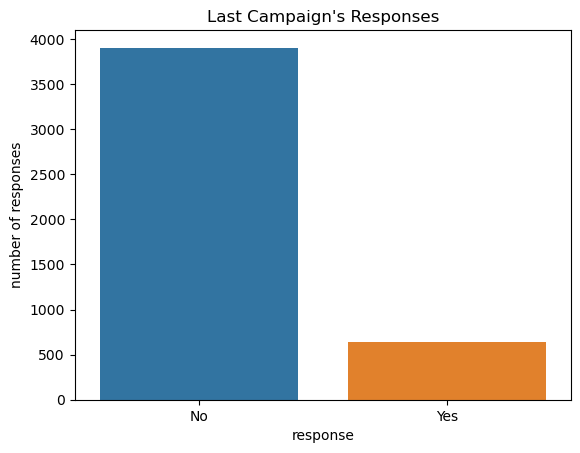

In [17]:
# 3. Show a plot of the total number of responses.

fig, ax = plt.subplots()
sns.countplot(data=df, x="response", ax = ax)

ax.set_xlabel("response")
ax.set_ylabel("number of responses")
ax.set_title("Last Campaign's Responses")

plt.show()

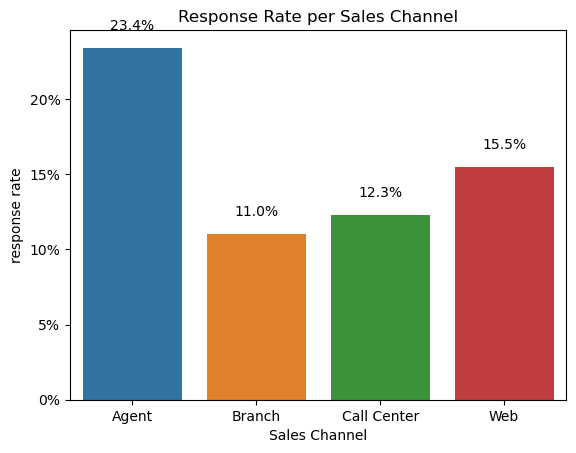

In [18]:
# 4. Show a plot of the response rate by the sales channel.

df_plot3 = df8_pivot.reset_index()

fig, ax = plt.subplots()
sns.barplot(data=df_plot3, x='sales_channel', y='response_rate')
ax.set_xlabel("Sales Channel")
ax.set_ylabel("response rate")
ax.set_title("Response Rate per Sales Channel")

# Format y-axis tick labels to include the '%' symbol
fmt = '%.0f%%'
yticks = plt.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

# Add y-values on top of the bars
for i, v in enumerate(df_plot3['response_rate']):
    plt.text(i, v + 1, str(v)+'%', ha='center', va='bottom')

plt.show()


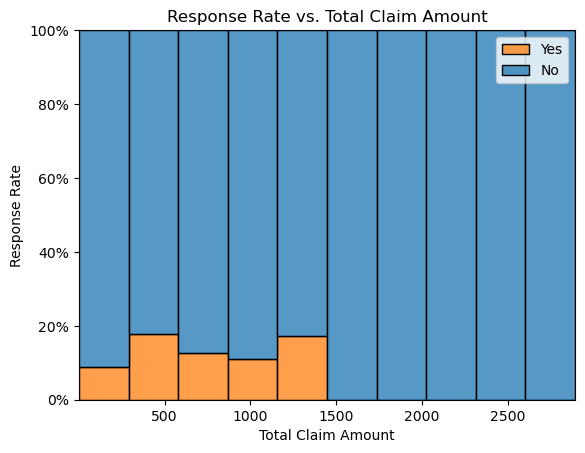

In [113]:
# 5. Show a plot of the response rate by the total claim amount.

# Copy total_claim_amount and response columns into new DataFrame
data = pd.DataFrame()
data['total_claim_amount']  = df['total_claim_amount']
data['response'] =  df['response']

# Change Yes and No values in response column to True / False
data['response'] = [ True if x == 'Yes' else False for x in data['response']]

# Plot the histogram using seaborn
ax = sns.histplot(data=data, x='total_claim_amount', bins=10, hue='response', multiple='fill')

# Change the legend labels
ax.legend(['Yes', 'No'])

# Convert y-axis labels from ratio to percent
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add labels and title to the plot
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.title('Response Rate vs. Total Claim Amount')

# Show the plot
plt.show()

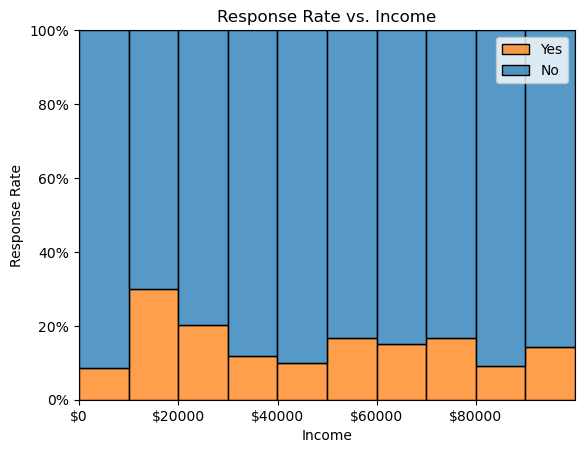

In [114]:
# 6. Show a plot of the response rate by income.

# Copy total_claim_amount and response columns into new DataFrame
data = pd.DataFrame()
data['income']  = df['income']
data['response'] =  df['response']

# Change Yes and No values in response column to True / False
data['response'] = [ True if x == 'Yes' else False for x in data['response']]

# Plot the histogram using seaborn
ax = sns.histplot(data=data, x='income', bins=10, hue='response', multiple='fill')

# Change the legend labels
ax.legend(['Yes', 'No'])

# Format y-axis labels from ratio to percent
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Format x-axis labels with dollar sign
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:.0f}'.format(x)))

# Add labels and title to the plot
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.title('Response Rate vs. Income')

# Show the plot
plt.show()